# Rydberg calcs
for the Rubidium FFPR experiment

Table of contents:
 * [Rydberg Energy Levels](#Rydberg-energy-levels)
 * [DC Polarizabilities](#Rydberg-DC-polarizabilities)
 * [AC Polarizabilities](#Rydberg-AC-polarizabilities)
 * [Transition Frequencies](#Transition-frequencies)
 * [Lifetimes](#Lifetimes)
 * [Rabi Frequencies](#Rabi-frequencies)
 * [Blockade Radius](#Blockade-radius)
 * [Microwave Transitions](#Microwave-transitions)
 * [LeRoy Radius](#LeRoy-radius)

In [170]:
from physconsts import *
from rbconsts import *
from numpy import *
from numpy.linalg import eigh
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # for fancy tick manipulation
from sympy.physics.wigner import wigner_6j,wigner_3j,clebsch_gordan
from time import time
from arc import *
from scipy.special import sph_harm as ylm

# local
from amophys import *
from simfuncs import *

# other
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

#### layout stuff
from IPython.core.display import display,HTML
display(HTML("<style>.container{width:100% !important;}</style>"))

## Rydberg energy levels

## Rydberg DC polarizabilities

### reproduce Donald Booth's result for Caesium
looks to agree with Fig. 3a

Found  780  states.
Generating matrix...
100%

Finding eigenvectors...
100%

plotting...


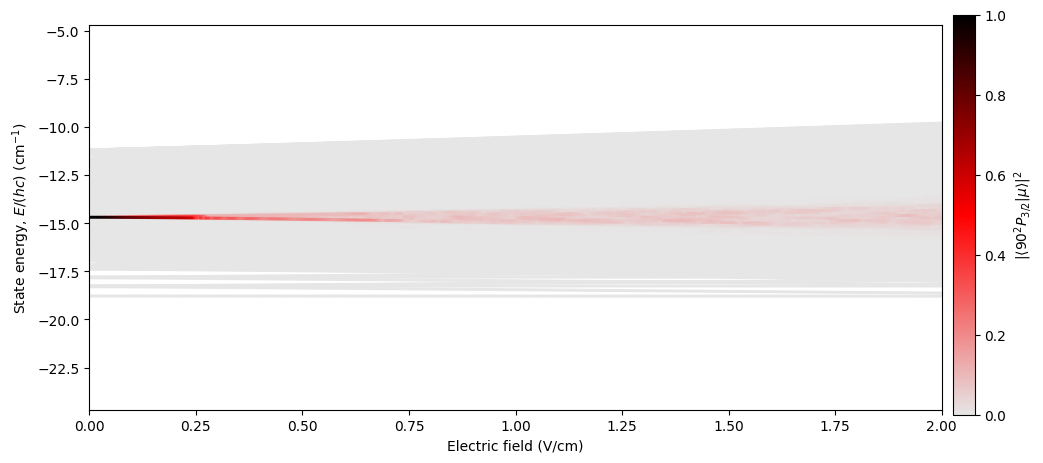

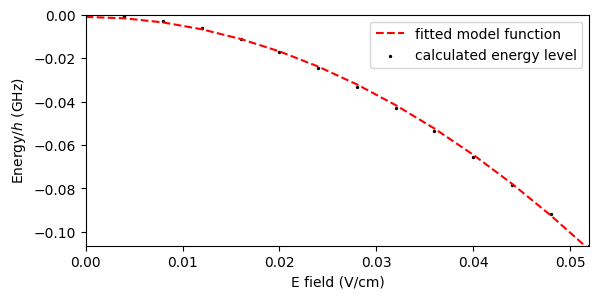

79292.36198 MHz cm^2 / V^2 


In [4]:
#Stark Map Caclulator
#====================
#Initialise a Stark-shift Solver for Caesium
calc = StarkMap(Caesium())

#Target state
n0=90;l0=1;j0=1.5;mj0=1.5;  
#Define max/min n values in basis
nmax=100
nmin=80
#Maximum value of l to include (l~20 gives good convergence for states with l<5)
lmax=20

#Initialise Basis States for Solver : progressOutput=True gives verbose output
calc.defineBasis(n0, l0, j0, mj0, nmin, nmax, lmax, progressOutput=True)

Emin=0. #Min E field (V/m)
Emax=200. #Max E field (V/m)
N=501 #Number of Points

#Generate Stark Map
calc.diagonalise(np.linspace(Emin,Emax,N), progressOutput=True)
#Show Sark Map
calc.plotLevelDiagram(progressOutput=True,units=1,highlighState=True)
calc.showPlot(interactive = False)
#Return Polarizability of target state
print("%.5f MHz cm^2 / V^2 " % calc.getPolarizability(showPlot=True, minStateContribution=0.9))
    

Found  820  states.
Generating matrix...
100%

Finding eigenvectors...
100%

plotting...


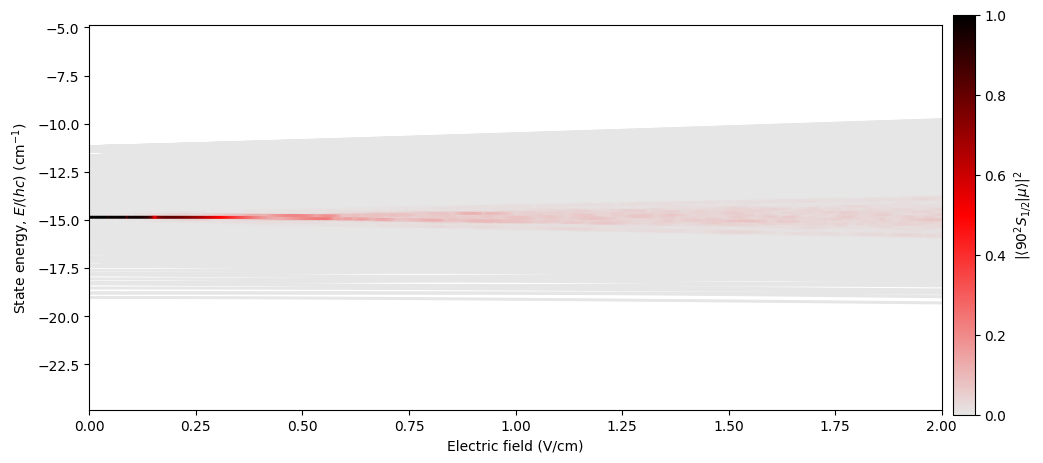

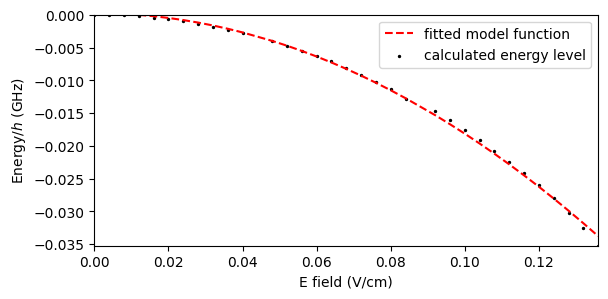

3678.45189 MHz cm^2 / V^2 


In [5]:
#Stark Map Caclulator
#====================
#Initialise a Stark-shift Solver for Caesium
calc = StarkMap(Caesium())

#Target state
n0=90;l0=0;j0=0.5;mj0=0.5;  
#Define max/min n values in basis
nmax=100
nmin=80
#Maximum value of l to include (l~20 gives good convergence for states with l<5)
lmax=20

#Initialise Basis States for Solver : progressOutput=True gives verbose output
calc.defineBasis(n0, l0, j0, mj0, nmin, nmax, lmax, progressOutput=True)

Emin=0. #Min E field (V/m)
Emax=200. #Max E field (V/m)
N=501 #Number of Points

#Generate Stark Map
calc.diagonalise(np.linspace(Emin,Emax,N), progressOutput=True)
#Show Sark Map
calc.plotLevelDiagram(progressOutput=True,units=1,highlighState=True)
calc.showPlot(interactive = False)
#Return Polarizability of target state
print("%.5f MHz cm^2 / V^2 " % calc.getPolarizability(showPlot=True, minStateContribution=0.9))

### Rubidium

In [5]:
# calculate the DC polarizability a range of fine structure states
calc = StarkMap(Rubidium())

#Target states
l0=0;j0=1/2;mj0=1/2;
steps = 1
n0_arr = arange(30,30+steps)
nrange_list = [[n-10,n+10] for n in n0_arr] #  max/min n values in basis for each calc
erange_arr = array([[90,492],[28,188],[19,75],[4,28],[4,14],\
                        [1,5],[1.4,3.2],[0.7,2],[0.6,1],[0.15,0.7],\
                        [0.35,0.7],[0.2,0.7],[0.15,0.45],[0.15,0.3],\
                        [0.003,0.2],[0.1,0.16]])*1e2 # V/m ranges
lmax=20
N=100 #Number of Points

dc_pol_arr_s = empty(steps)

i = 0
for n0,nrange in zip(n0_arr,nrange_list):
    nmin,nmax = nrange
    #Initialise Basis States for Solver : progressOutput=True gives verbose output
    calc.defineBasis(n0, l0, j0, mj0, nmin, nmax, lmax, progressOutput=True)
    calc.diagonalise(np.linspace(Emin,Emax,N), progressOutput=True)
    dc_pol_arr_s[i] = calc.getPolarizability(minStateContribution=0.9)
    i += 1

Found  818  states.
Generating matrix...
100%

Finding eigenvectors...
100%



In [6]:
dc_pol_arr_s

array([0.])

In [ ]:
fig,ax = plt.subplots()
styles = ['r.','b.','g.']

ax.plot(nr_arr, dc_pol_arr[i],style[0])#,label=rf'$\Omega=2\pi \times${*1e3/(2*pi):.1f}MHz')
ax.set_title(r"DC polarizability for states $|n,l=0,j=1/2,m_j=1/2\rangle$")
ax.set_xlabel(r"Principal quantum number, $n$")
ax.set_ylabel(r"Polarizability $[MHz/(V/cm)^2]$")
ax.legend()

Found  818  states.
Generating matrix...
100%

Finding eigenvectors...
100%

plotting...


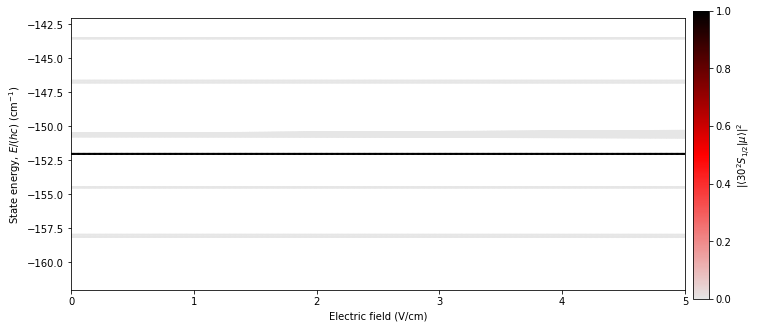

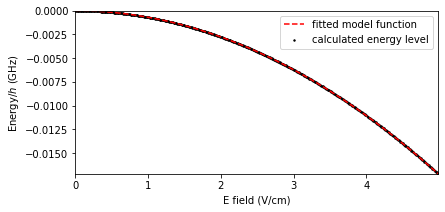

1.38014 MHz cm^2 / V^2 


In [34]:
#Stark Map Caclulator
#====================
#Initialise a Stark-shift Solver for Rubidium
calc = StarkMap(atom)

#Target state
n0=30;l0=0;j0=0.5;mj0=0.5;  
#Define max/min n values in basis
nmax=40
nmin=20
#Maximum value of l to include (l~20 gives good convergence for states with l<5)
lmax=20

#Initialise Basis States for Solver : progressOutput=True gives verbose output
calc.defineBasis(n0, l0, j0, mj0, nmin, nmax, lmax, progressOutput=True)

Emin=0. #Min E field (V/m)
Emax=500. #Max E field (V/m)
N=501 #Number of Points

#Generate Stark Map
calc.diagonalise(np.linspace(Emin,Emax,N), progressOutput=True)
#Show Sark Map
calc.plotLevelDiagram(progressOutput=True,units=1,highlighState=True)
calc.showPlot(interactive = False)
#Return Polarizability of target state
print("%.5f MHz cm^2 / V^2 " % calc.getPolarizability(showPlot=True, minStateContribution=0.9))

Found  820  states.
Generating matrix...
100%

Finding eigenvectors...
100%

plotting...


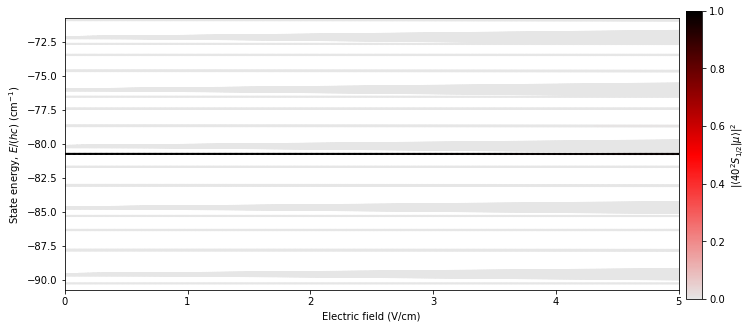

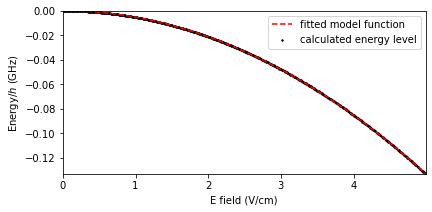

10.66301 MHz cm^2 / V^2 


In [39]:
#Stark Map Caclulator
#====================
#Initialise a Stark-shift Solver for Rubidium
calc = StarkMap(atom)

#Target state
n0=40;l0=0;j0=0.5;mj0=0.5; 
#Define max/min n values in basis
nmax=50
nmin=30
#Maximum value of l to include (l~20 gives good convergence for states with l<5)
lmax=20

#Initialise Basis States for Solver : progressOutput=True gives verbose output
calc.defineBasis(n0, l0, j0, mj0, nmin, nmax, lmax, progressOutput=True)

Emin=0. #Min E field (V/m)
Emax=500. #Max E field (V/m)
N=501 #Number of Points

#Generate Stark Map
calc.diagonalise(np.linspace(Emin,Emax,N), progressOutput=True)
#Show Sark Map
calc.plotLevelDiagram(progressOutput=True,units=1,highlighState=True)
calc.showPlot(interactive = False)
#Return Polarizability of target state
print("%.5f MHz cm^2 / V^2 " % calc.getPolarizability(showPlot=True, minStateContribution=0.9))

## Transition frequencies

In [6]:
# calculate resonance frequencies from 5P3/2 -> nS1/2

atom = Rubidium()

In [24]:
n_e = range(20,100)
r_states = [[n,0,0.5] for n in n_e] # n,l,j
e_state = [5,1,1.5]

frequencies = array([atom.getEnergy(*r_state) - 
               atom.getEnergy(*e_state) for r_state 
               in r_states])

Text(0, 0.5, '$\\lambda [n]$')

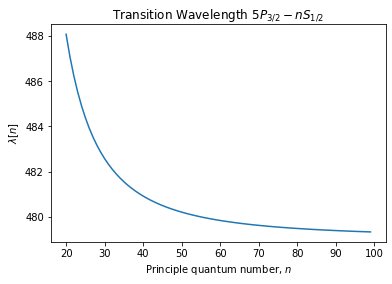

In [93]:
# second photon wavelength vs Rydberg state addressed. 
# how far can we tune the LD, TA, and PPKTP crystal?

fig,ax = plt.subplots()
ax.plot(n_e,c/eVToGHz(frequencies))
ax.set_title(r"Transition Wavelength $5P_{3/2}-nS_{1/2}$")
ax.set_xlabel("Principle quantum number, $n$")
ax.set_ylabel("$\lambda [n]$")

## Lifetimes

In [2]:
atom = Rubidium()
stateL = 0; stateJ = 1/2
lifetimes = []
nList = np.arange(20,90)
for n in nList:
#     noBBR = 1./atom.getStateLifetime(n,stateL,stateJ,temperature=0)
    withBBR = 1./atom.getStateLifetime(n,stateL,stateJ,temperature=295,includeLevelsUpTo=n+10)
    lifetimes.append(1/withBBR)
lifetimes = array(lifetimes)*1e6

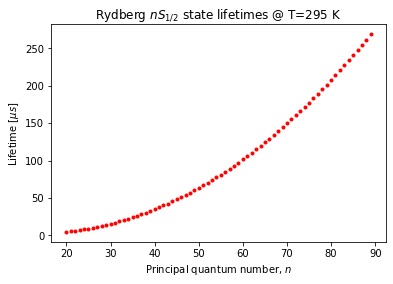

In [6]:
ax = plt.subplot(111)
ax.set_title("Rydberg $nS_{1/2}$ state lifetimes @ T=295 K")
ax.plot(nList,lifetimes,"r.")
ax.set_xlabel(r"Principal quantum number, $n$")
ax.set_ylabel(r"Lifetime $[\mu s]$")
plt.show()

In [8]:
# fname = 'rydberg_s_state_tau_295K_20211011.csv'
# soln_to_csv(fname, [nList,lifetimes], ['n', r'lifetime [$\mu s$]'])

wrote data to rydberg_s_state_tau_295K_20211011.csv


## Rabi frequencies

In [18]:
# second photon transition Rabi frequency

atom = Rubidium87()

steps = 70
nr_range = arange(20,20+steps,1)
lr,jr,mjr = [0,1/2,1/2]
ne,le,je = [5,1,3/2]
mje_list = [1/2,3/2]

d_arr = empty((len(mje_list),steps))
for i,mje in enumerate(mje_list):
    q=mjr-mje
    for j,nr in enumerate(nr_range):
        d_arr[i,j] = atom.getDipoleMatrixElement(ne,le,je,mje,nr,lr,jr,mjr,q)

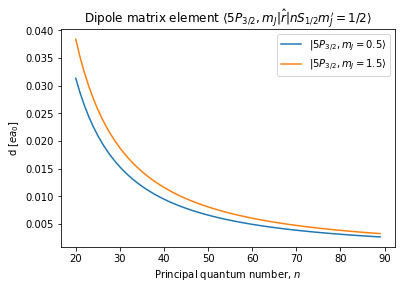

In [34]:
fig,ax = plt.subplots()
states = [[ne,le,je,mje] for mje in mje_list]
for i,s in enumerate(states):
    ne,le,je,mje = s
    ax.plot(nr_range,abs(d_arr[i]),label=r'$|5P_{3/2},m_J=$'+f'{mje}'+r'$\rangle$')
ax.set_title(r"Dipole matrix element $\langle 5P_{3/2},m_J|\hat{r}|nS_{1/2}m_J'={1/2}\rangle$")
ax.set_ylabel(r'd [$e a_0$]')
ax.set_xlabel(r'Principal quantum number, $n$')
ax.legend()

In [12]:
atom.dipoleMatrixElem?

Object `atom.dipoleMatrixElem` not found.


## Blockade Radius

The "blockade" between two Rydberg atoms of the same state occurs due to the van der Waals interaction, which shifts the Rydberg state energy of one of the atoms. Blockade happens provided that the vdW potential is stronger than the Rabi frequency driving the Rydberg transition on the blockaded atom. Because the vdW potential is dependent on the distance between the two atoms, we can define a blockade radius $R_b$ at which the blockade mechanism begins to fail because the vdW potential is equal to the Rabi frequency.

Note that while it is necessary to keep atoms within a sphere of radius $R_b$ to have successful blockade, the blockade will also break down if the atoms are spaced too closely. In the vdW regime, state mixing is low and the potential is that of interacting induced dipoles (i.e. the states do not have definite parity). However, when the atoms are closer together, strong state mixing will occur such that opposite parity states are mixed to form states of quasi-definite parity. These quasi-definite parity states have quasi-permanent dipole moments and the interaction scales as $1/R^3$. At even shorter spacing, the wavefunctions of the atom significantly overlap, and the state mixing becomes complicated and difficult to predict. At some distances between the atoms in this regime, the potential has a zero crossing, and the blockade completely fails.

In [ ]:
# the blockade between same Rydberg states for a fixed excitation Rabi frequency

atom = Rubidium87()

# the two-photon Rabi frequeny [GHz]. conservative estimate
Omega_list = 2*pi*array([1e-2,1e-3,1e-4])
steps = 61
nr_arr = arange(30,30+steps)
lr, jr, mjr = [0, 1/2, 1/2]
theta = phi = 0 # the angles between orientations for each Rydberg atom
nrange = 5 # range of n to consider in the c6 calc
energy_delta = 100e9 # max energy diff. [Hz] between the original pair state and the other pair states in the calc
c6_arr = empty(steps)
blockade_arr = empty((len(Omega_list),steps))

for i,nr in enumerate(nr_arr):
    
    # get c6 for states nr,lr,jr
    calc = PairStateInteractions(atom, nr, lr, jr, nr, lr, jr, mjr, mjr)
    c6_arr[i] = calc.getC6perturbatively(theta,phi,nrange,energy_delta)

In [83]:
Omega_list = 2*pi*array([1e-2,1e-3,1e-4])
for i,Omega in enumerate(Omega_list):
    for j,c6 in enumerate(c6_arr):
        blockade_arr[i,j] = abs((c6/Omega))**(1/6)

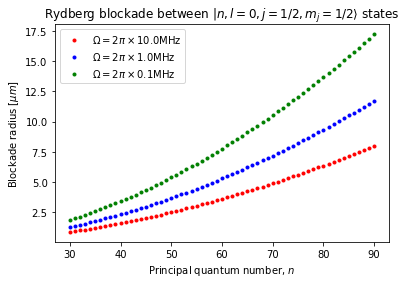

In [92]:
fig,ax = plt.subplots()
styles = ['r.','b.','g.']
for i,sO in enumerate(zip(styles,Omega_list)):
    s,O = sO
    ax.plot(nr_arr, blockade_arr[i],s,label=rf'$\Omega=2\pi \times${O*1e3/(2*pi):.1f}MHz')
ax.set_title(r"Rydberg blockade between $|n,l=0,j=1/2,m_j=1/2\rangle$ states")
ax.set_xlabel(r"Principal quantum number, $n$")
ax.set_ylabel(r"Blockade radius $[\mu m]$")
ax.legend()

In [133]:
# fname = 'blockade_rad_vs_n_and_rabi_20211011.csv'
# data = append(array([nr_arr]),blockade_arr,axis=0)
# soln_to_csv(fname, data, labels=['n']+[rf'$\Omega=2\pi \times${O*1e3/(2*pi):.1f}MHz' for O in Omega_list])

wrote data to blockade_rad_vs_n_and_rabi_20211011.csv


C:\Users\prest\.virtualenvs\rubidium-6bgZCrz4\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\prest\.virtualenvs\rubidium-6bgZCrz4\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\prest\.virtualenvs\rubidium-6bgZCrz4\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


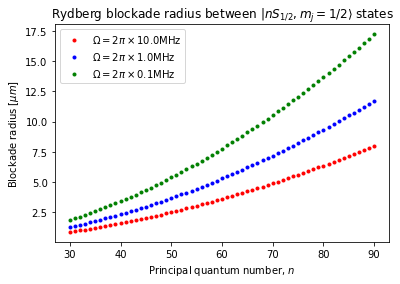

In [36]:
fname = 'blockade_rad_vs_n_and_rabi_20211011.csv'

fig,ax = plt.subplots()
styles = ['r.','b.','g.']
data,labels = soln_from_csv(fname)
for i,s in enumerate(styles):
    ax.plot(data[0], data[i+1],s,label=labels[i+1])
ax.set_title(r"Rydberg blockade radius between $|nS_{1/2},m_j=1/2\rangle$ states")
ax.set_xlabel(r"Principal quantum number, $n$")
ax.set_ylabel(r"Blockade radius $[\mu m]$")
ax.legend()

## Microwave transitions

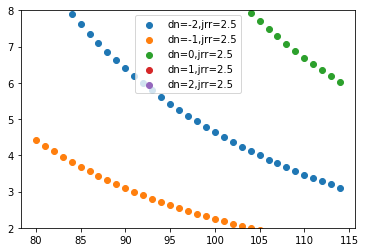

In [148]:
# reproduce Minho's plot on the wiki https://wiki.physics.wisc.edu/saffmanwiki/Literature/Rb
# i only reproduce the (n-1)F5/2 - nD5/2 and nD5/2 - (n-2)F5/2 curves. my other curves are a bonus. 

states = 35 
nr0 = 80
nr_arr = arange(nr0,nr0+states,1)
lr = 2
jr = 5/2
dn_arr = arange(-2,3,1) # primed states have nrr = nr + dn
lrr = 3
jrr_list = [5/2]
abs(atom.getTransitionFrequency(nr,lr,jr,nr+dn,lrr,jrr))

data = [[[abs(atom.getTransitionFrequency(nr,lr,jr,nr+dn,lrr,jrr))/(1e9) for nr in nr_arr] 
         for dn in dn_arr]
         for jrr in jrr_list]
for i,jrr in enumerate(jrr_list):
    for j,dn in enumerate(dn_arr):
        plt.scatter(nr_arr,data[i][j],label=f'dn={dn},jrr={jrr}')
plt.ylim((2,8))
plt.legend()

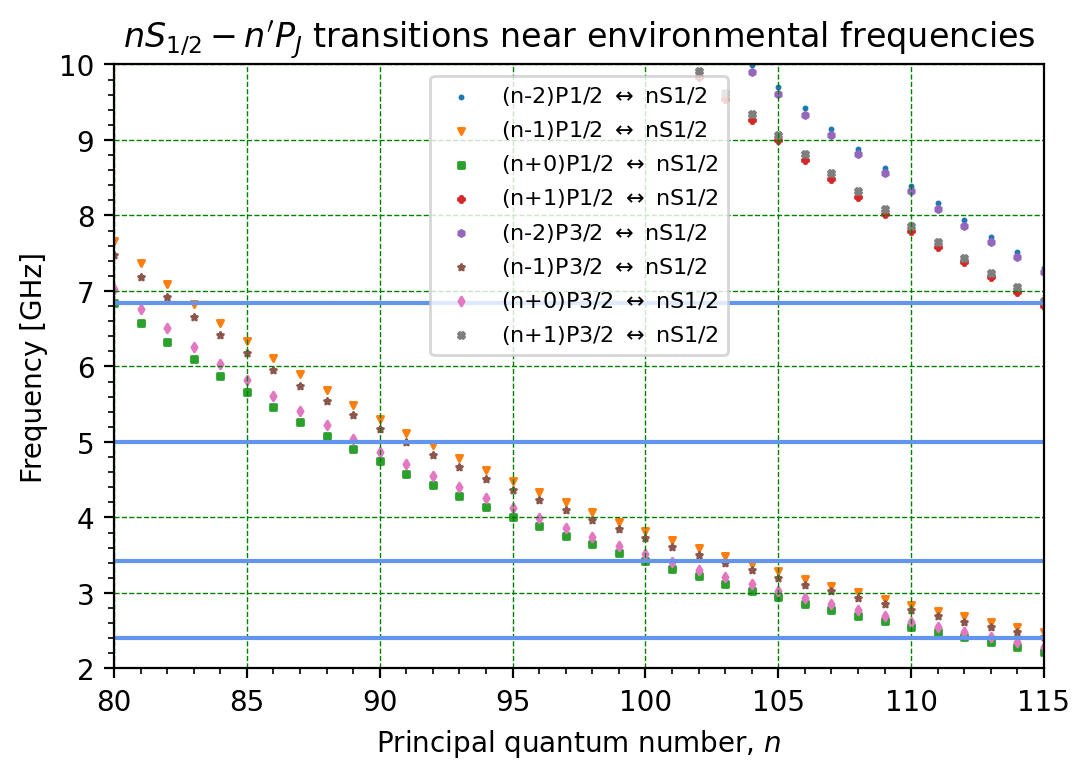

In [199]:
# transitions from nS1/2 to n'P1/2 and n'P3/2

states = 36
nr0 = 80
nr_arr = arange(nr0,nr0+states,1)
lr = 0
jr = 1/2
dn_arr = arange(-2,3,1) # primed states have nrr = nr + dn
lrr = 1
jrr_list = [1/2,3/2]

dn_map = {-1:'',1:'+',0:'+'}
l_map = {0:'S',1:'P',2:'D'}
j_map = {0.5:'1/2',1.5:'3/2',2.5:'5/2'}

data = [[[abs(atom.getTransitionFrequency(nr,lr,jr,nr+dn,lrr,jrr))/(1e9) for nr in nr_arr] 
         for dn in dn_arr]
         for jrr in jrr_list]

shapes = iter(['.','v','s','P','h','*','d','X'])

fig,ax = plt.subplots(dpi=200)

ymin = 2
ymax = 10
for i,jrr in enumerate(jrr_list):
    for j,dn in enumerate(dn_arr):
        if len([y for y in data[i][j] if y > ymin and y < ymax]): 
            lbl='(n'+dn_map[sign(dn)]+rf'{dn}){l_map[lrr]}{j_map[jrr]} $\leftrightarrow$ n{l_map[lr]}{j_map[jr]}'
            ax.scatter(nr_arr,data[i][j], label=lbl, s=5, marker=next(shapes))

ax.set_title("$nS_{1/2} - n'P_{J}$ transitions near environmental frequencies")
ax.set_ylabel(r"Frequency [GHz]")
ax.set_xlabel(r"Principal quantum number, $n$")

badfreqs = [6.834,6.834/2,5,2.4]
for freq in badfreqs:
    ax.axhline(y=freq, color='cornflowerblue')
ax.set_ylim((ymin,ymax))
ax.set_xlim((nr0,nr0+states-1))

ax.grid(True, which='major',color='green',linestyle='--',linewidth=0.5)
# ax.xaxis.set_minor_locator(MultipleLocator(5))
# ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.tick_params(axis='x', which='minor')#, bottom=False)
plt.minorticks_on()
plt.legend(prop={'size':8})

In [194]:
6.834/2

3.417

## 